In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import nibabel as nib
import tensorflow as tf
from tensorflow import keras

base_train = '/kaggle/input/clustering-function/'
base_test = '/kaggle/input/clustering-function-test/'
base_csv = '/kaggle/input/trends-assessment-prediction/'


# for svm data must be scaled
#tensorflow-gpu
device_name = tf.test.gpu_device_name()
if "GPU" not in device_name:
    print("GPU device not found")
print('Found GPU at: {}'.format(device_name))


GPU device not found
Found GPU at: 


In [2]:
train_scores = pd.read_csv(base_csv + 'train_scores.csv')

In [3]:
train_scores.head()

,Id,age,domain1_var1,domain1_var2,domain2_var1,domain2_var2
0,10001,57.436077,30.571975,62.553736,53.325130,51.427998
1,10002,59.580851,50.969456,67.470628,60.651856,58.311361
2,10004,71.413018,53.152498,58.012103,52.418389,62.536641
3,10005,66.532630,NaN,NaN,52.108977,69.993075
4,10007,38.617381,49.197021,65.674285,40.151376,34.096421


In [4]:
# load . nii file and convert to numpy array
def load_nii(file_path):
    img = nib.load(file_path)
    #nparray
    data = img.get_fdata()
    print(data.shape)
    print(type(data))
    return data

# returns volume of cluster
def cluster_volume(array, n_cluster):
    return np.sum(array == n_cluster)


In [5]:
# create df for volumes
volumes_df = pd.DataFrame(index= train_scores['Id'], columns= range(51)
#volumes.loc[10001,:] = volume1
volumes_df.head()

SyntaxError: invalid syntax (<ipython-input-5-6ca2311b7488>, line 4)

In [6]:
# load training volumes data into dataframe
for file_num in train_scores['Id']:
    #load file
    array_3d = load_nii(base_train + "{}.nii".format(file_num))
    #calculate volume data into list
    vol_list = []
    for i in range(51):
        vol_list.append(cluster_volume(array_3d, i))
    #insert into df
    volumes_df.loc[file_num, :] = vol_list
    
volumes_df.head()

(53, 63, 52)
<class 'numpy.memmap'>


NameError: name 'volumes_df' is not defined

In [7]:
volumes_df = volumes_df.astype(np.float)
volumes_df.info()

NameError: name 'volumes_df' is not defined

In [8]:
volumes_df.to_csv('volumes_df.csv')

NameError: name 'volumes_df' is not defined

In [9]:
volume1 = []
for i in range(51):
    vol1 = cluster_volume(array_10001, i)
    volume1.append(vol1)
    vol2 = cluster_volume(array_10002, i)  

NameError: name 'array_10001' is not defined

In [10]:
array_10001 = load_nii(base_train + '10001.nii')
array_10002 = load_nii(base_train + '10002.nii')

(53, 63, 52)
<class 'numpy.memmap'>
(53, 63, 52)
<class 'numpy.memmap'>


In [11]:
coord_0 = np.where(array_10001[:, :, 20] == 0)
x, y = coord_0
X = np.hstack((x, y))
plt.plot(x, y, 'b.')
plt.show()
print(X.shape)
print(np.sum(array_10001[:, :, 20] == 0))

NameError: name 'plt' is not defined

In [12]:
plt.imshow(array_10001[:, :, 14])

NameError: name 'plt' is not defined

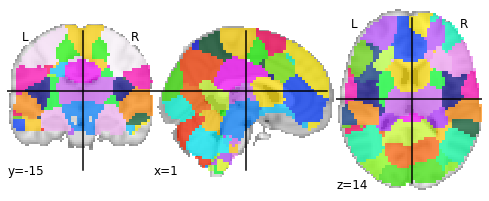

In [13]:
from nilearn import plotting 
a10001_nii = nib.load(base_train + '10001.nii')
plotting.plot_roi(a10001_nii)